In [16]:
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib as plt

In [17]:
# parameters
SEX_SCHEMA_THRESHOLD = 1 # at what level of schematic shift will someone present clinically
HOMOSEXUALITY_THRESHOLD = 0.75 # at what level of cross-sexual orientation will one identify as homosexual
mascfem_loadings = [0.6, 0.95, 0.75, 0.65, 0.3, 0.2, 0.1, 0.3, 0.1, 0.4]

In [18]:
class Subject():
    def __init__(self):
        self.mascfem = 0
        self.features = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        self.autogynephilia = 0
        self.autoandrophilia = 0
        self.etii_etiologic = False
        self.cross_schematic = False
        self.transsexual = False
        self.natal_sex = 'None'
        self.orientation_label = 'None'
        return

    def generate_feature(self, index, feature_loading):
        term_1 = feature_loading * self.mascfem
        error = np.random.randn()
        feature = term_1 + error
        self.features[index] = feature
        return
    
    def determine_agp(self):
        if self.features[0] < -1.25:
            self.autogynephilia = 0
            return
        self.autogynephilia = np.random.exponential(1.75)
        return
        
    def determine_aap(self):
        if self.features[0] > 1.25:
            self.autoandrophilia = 0
            return
        self.autoandrophilia = np.random.exponential(1.75)
        return
    
    def to_dict(self):
        return {
            'natal sex': self.natal_sex,
            'trans': self.transsexual,
            'orientation': self.features[0],
            'orientation label': self.orientation_label,
            'agp': self.autogynephilia,
            'aap': self.autoandrophilia,
            'cross-schematic': self.cross_schematic,
            'etii': self.etii_etiologic,
            'overall masc-fem': self.mascfem,
            'highly_dimorphic': self.features[2],
            'kinda_dimorphic': self.features[9],
            'barely_dimorphic': self.features[8],

        }
    
class Masc(Subject):
    def __init__(self):
        super().__init__()
        self.natal_sex = 'Male'
        self.mascfem = np.random.normal(4, 1.95)

        for index, loading in enumerate(mascfem_loadings):
            self.generate_feature(index, loading)
        self.determine_aap()
        self.determine_agp()
        self.determine_etii()
        self.determine_cross_schema()

        if self.features[0] > HOMOSEXUALITY_THRESHOLD: self.orientation_label = 'Straight Male'
        elif self.features[0] < -HOMOSEXUALITY_THRESHOLD: self.orientation_label = 'Gay Male'
        else: self.orientation_label = 'Bi Male'
        return
    
    def determine_etii(self):
        multiplier = 1 + (self.autogynephilia ** self.autogynephilia)
        base_rate = 0.00000001
        p = base_rate * multiplier
        if p > 0.3: p = 0.3
        if np.random.binomial(1, p):
            self.etii_etiologic = True
            self.transsexual = True
        return
    
    def determine_cross_schema(self):
        if self.features[1] < -SEX_SCHEMA_THRESHOLD:
            self.cross_schematic = True
            self.transsexual = True


class Fem(Subject):
    def __init__(self):
        super().__init__()
        self.natal_sex = 'Female'
        self.mascfem = np.random.normal(-4, 1.95)

        for index, loading in enumerate(mascfem_loadings):
            self.generate_feature(index, loading)
        self.determine_aap()
        self.determine_agp()
        self.determine_etii()
        self.determine_cross_schema()
        if self.features[0] > HOMOSEXUALITY_THRESHOLD: self.orientation_label = 'Gay Female'
        elif self.features[0] < -HOMOSEXUALITY_THRESHOLD: self.orientation_label = 'Straight Female'
        else: self.orientation_label = 'Bi Female'
        return
    
    def determine_etii(self):
        multiplier = 1 + (self.autoandrophilia ** self.autoandrophilia)
        base_rate = 0.00000001
        p = base_rate * multiplier
        if p > 0.3: p = 0.3
        if np.random.binomial(1, p):
            self.etii_etiologic = True
            self.transsexual = True
        return
    
    def determine_cross_schema(self):
        if self.features[1] > SEX_SCHEMA_THRESHOLD:
            self.cross_schematic = True
            self.transsexual = True

In [19]:
male_sample: list[Subject] = []
female_sample: list[Subject] = []

for i in range(500000):
    male_sample.append(Masc())
    female_sample.append(Fem())

sample = male_sample + female_sample

In [20]:
sample_df = pd.DataFrame.from_records([subjects.to_dict() for subjects in sample])
sample_df

,natal sex,trans,orientation,orientation label,agp,aap,cross-schematic,etii,overall masc-fem,highly_dimorphic,kinda_dimorphic,barely_dimorphic
0,Male,False,4.839306,Straight Male,0.817044,0.000000,False,False,9.207760,7.233969,3.842704,0.210296
1,Male,False,0.484880,Bi Male,0.034276,2.145979,False,False,2.194161,3.233576,0.809919,0.271876
2,Male,False,0.352372,Bi Male,1.079556,0.078774,False,False,-0.983575,-0.681274,-0.521521,-0.030023
3,Male,False,2.933454,Straight Male,0.922331,0.000000,False,False,1.663696,2.731953,1.698907,2.076562
4,Male,False,0.233207,Bi Male,0.203571,0.128154,False,False,2.573017,2.992694,1.692606,0.359536
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Female,False,-3.640829,Straight Female,0.000000,0.646060,False,False,-7.509864,-5.383151,-4.034146,-1.214586
999996,Female,False,-3.471957,Straight Female,0.000000,4.361323,False,False,-5.794908,-5.836285,-1.467111,0.187060
999997,Female,False,-3.062085,Straight Female,0.000000,0.444855,False,False,-5.901783,-2.874174,-1.924177,1.501038
999998,Female,False,-1.390806,Straight Female,0.000000,2.272918,False,False,-1.024120,-2.170749,0.395877,-0.593374


In [21]:
bi_transfems = sample_df[sample_df['trans'] == True][sample_df['natal sex'] == 'Male'][sample_df['orientation'] < HOMOSEXUALITY_THRESHOLD][sample_df['orientation'] > -HOMOSEXUALITY_THRESHOLD]

transbians = sample_df[sample_df['trans'] == True][sample_df['natal sex'] == 'Male'][sample_df['orientation'] > HOMOSEXUALITY_THRESHOLD]

het_transfems = sample_df[sample_df['trans'] == True][sample_df['natal sex'] == 'Male'][sample_df['orientation'] < -HOMOSEXUALITY_THRESHOLD]

n = len(bi_transfems) + len(transbians) + len(het_transfems)

len(bi_transfems) / n * 100, len(transbians) / n * 100, len(het_transfems) / n * 100, 

C:\Users\ka99x\AppData\Local\Temp\ipykernel_19368\1456113341.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bi_transfems = sample_df[sample_df['trans'] == True][sample_df['natal sex'] == 'Male'][sample_df['orientation'] < HOMOSEXUALITY_THRESHOLD][sample_df['orientation'] > -HOMOSEXUALITY_THRESHOLD]
C:\Users\ka99x\AppData\Local\Temp\ipykernel_19368\1456113341.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bi_transfems = sample_df[sample_df['trans'] == True][sample_df['natal sex'] == 'Male'][sample_df['orientation'] < HOMOSEXUALITY_THRESHOLD][sample_df['orientation'] > -HOMOSEXUALITY_THRESHOLD]
C:\Users\ka99x\AppData\Local\Temp\ipykernel_19368\1456113341.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bi_transfems = sample_df[sample_df['trans'] == True][sample_df['natal sex'] == 'Male'][sample_df['orientation'] < HOMOSEXUALITY_THRESHOLD][sample_df['orientation'] > -HOMOSEXUALITY_

(37.789065632936776, 34.51410239272825, 27.696831974334984)

In [22]:
agps = len(
    sample_df[sample_df['agp'] > 3]
)

etii = len(
    sample_df[sample_df['etii'] == True]
)

agps, etii

(109504, 3388)

In [23]:
sample_df['trans'].value_counts()

trans
False    985307
True      14693
Name: count, dtype: int64

C:\Users\ka99x\AppData\Local\Temp\ipykernel_19368\164269148.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = sample_df[sample_df['trans'] == True][sample_df['natal sex'] == 'Male']


<Axes: xlabel='overall masc-fem', ylabel='Count'>

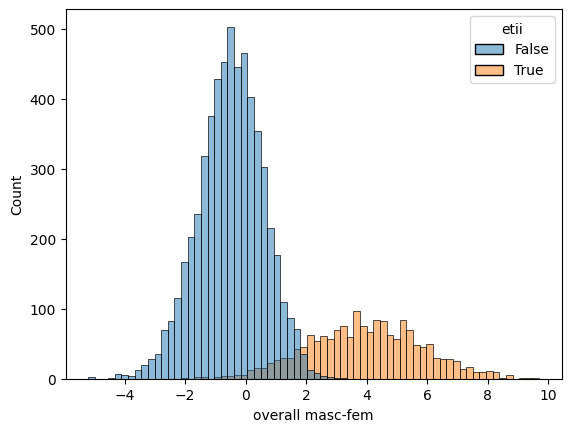

In [24]:

data = sample_df[sample_df['trans'] == True][sample_df['natal sex'] == 'Male']
sns.histplot(data, x=data['overall masc-fem'], hue='etii')

In [25]:
AGP_transbian_proportion = len(transbians[transbians['cross-schematic'] == False]) / len(transbians)
AGP_transsapphic_proportion = (len(transbians[transbians['cross-schematic'] == False]) + len(bi_transfems[bi_transfems['cross-schematic'] == False])) / (len(transbians) + len(bi_transfems)) 

print(f'Under the current model the proportion of AGP transbians is {AGP_transbian_proportion}')
print(f'Under the current model the proportion of AGP sapphic trans women is {AGP_transsapphic_proportion}')


Under the current model the proportion of AGP transbians is 0.569713400464756
Under the current model the proportion of AGP sapphic trans women is 0.31244222591976334


<Axes: xlabel='overall masc-fem', ylabel='Count'>

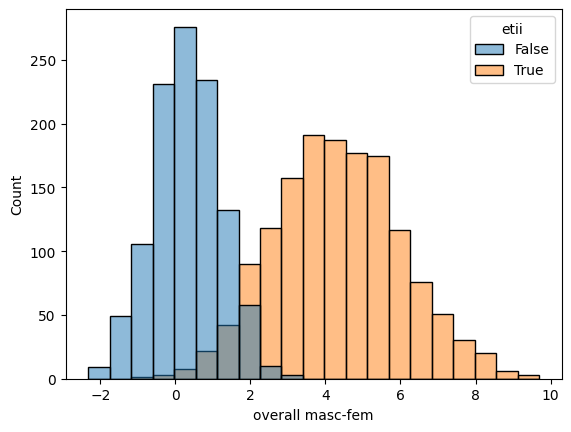

In [26]:
sns.histplot(transbians, x=transbians['overall masc-fem'], hue='etii')


In [27]:
gynephilic_natal_males = sample_df[sample_df['natal sex'] == 'Male'][sample_df['orientation label'] == 'Straight Male']
gynephilic_natal_males[gynephilic_natal_males['trans'] == False]['kinda_dimorphic'].mean(), gynephilic_natal_males[gynephilic_natal_males['trans'] == True]['kinda_dimorphic'].mean() 


C:\Users\ka99x\AppData\Local\Temp\ipykernel_19368\12763588.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gynephilic_natal_males = sample_df[sample_df['natal sex'] == 'Male'][sample_df['orientation label'] == 'Straight Male']


(np.float64(1.7636277543287726), np.float64(1.0660536140059342))

"Sexual Orientation in Transgender adults in the United States" by Reisner et al. is a 2023 study that found the following rates.

### In Trans Women

* Straight/Heterosexual: 23.3%
* Lesbian: 11.3%
* Gay: 5.8%
* Bisexual: 28.9%
* Queer: 5.8%
* Same-Gender loving: 4.6%
* Other: 6.8%
* Asexual Spectrum: 3.6%
* Pansexual: 9.9%

### this can also be viewed as:

* Androphilc: ~25%
* gynephilic: ~15%
* bisexual: ~40%
* Ace: ~4%

(this doesn't add up to 100% but i'm dealing with some non-interpretability.)

another method. they found:

* attracted to cis women: 68%
* attracted to cis men: 65%

if we assume that anyone not attracted to cis men is either asexual or gynephilic, and
if we assume that anyone not attracted to cis women is either asexual or androphilic, then

we can deduce that 100 - 68 - 3 = 29% are androsexual, and
100 - 65 - 3 = 32% are gynesexual
then 100 - 3 - 32 - 29 = 36 are bisexual

that would give us:

* Androphilic 29%
* Gynephilic: 32%
* Bisexual: 36%
* Asexuals: 3%

(this is very similar to what my model generated. Some tweaking can do even better)

(np.float64(1.0181465837863406), np.float64(-0.4015554620431199))

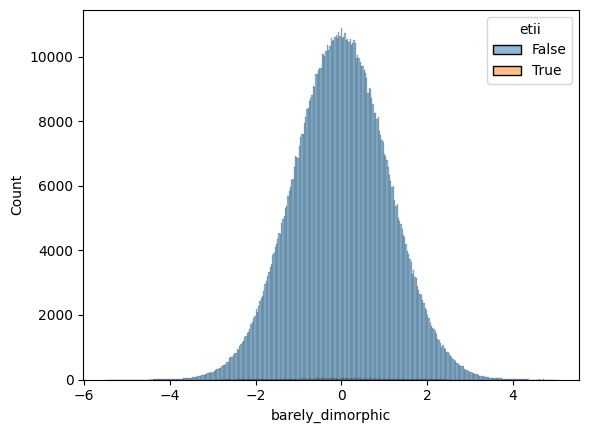

In [28]:
sns.histplot(sample_df, x=sample_df['barely_dimorphic'], hue='etii')
sample_df[sample_df['natal sex'] == 'Male']['barely_dimorphic'].std(), sample_df[sample_df['natal sex'] == 'Female']['barely_dimorphic'].mean()